In [1]:
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline
import time
import random
import numpy as np
from tensorflow.keras.models     import Sequential
from tensorflow.keras.layers     import Dense
from tensorflow.keras.optimizers import Adam

c:\users\kesha\anaconda3\envs\dlnd\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\kesha\anaconda3\envs\dlnd\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\kesha\anaconda3\envs\dlnd\lib\site-packages\tensorflow\python\framework\dtypes.py:525: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\users\kesha\anaconda3\envs\dlnd\lib\site-packages\tensorflow\python\frame

In [2]:
import gym
env = gym.make('CartPole-v1')
env.reset()

array([ 0.01319475,  0.02808479, -0.02533131,  0.02412101])

In [3]:
goal_steps = 500
score_requirement = 60
intial_games = 10000

In [4]:
def model_data_preparation():
    training_data = []
    accepted_scores = []
    for game_index in range(intial_games):
        score = 0
        game_memory = []
        previous_observation = []
        for step_index in range(goal_steps):
            action = random.randrange(0, 2)
            observation, reward, done, info = env.step(action)
            
            if len(previous_observation) > 0:
                game_memory.append([previous_observation, action])
                
            previous_observation = observation
            score += reward
            if done:
                break
            
        if score >= score_requirement:
            accepted_scores.append(score)
            for data in game_memory:
                if data[1] == 1:
                    output = [0, 1]
                elif data[1] == 0:
                    output = [1, 0]
                training_data.append([data[0], output])
        
        env.reset()

    print(accepted_scores)
    
    return training_data

In [5]:
training_data = model_data_preparation()

[60.0, 68.0, 60.0, 69.0, 60.0, 71.0, 62.0, 81.0, 65.0, 65.0, 64.0, 65.0, 82.0, 112.0, 100.0, 69.0, 70.0, 65.0, 95.0, 89.0, 75.0, 73.0, 80.0, 70.0, 63.0, 62.0, 73.0, 74.0, 68.0, 93.0, 60.0, 66.0, 62.0, 68.0, 65.0, 71.0, 85.0, 61.0, 62.0, 61.0, 66.0, 75.0, 84.0, 61.0, 60.0, 72.0, 71.0, 62.0, 102.0, 64.0, 93.0, 80.0, 74.0, 61.0, 64.0, 63.0, 63.0, 62.0, 74.0, 69.0, 131.0, 62.0, 63.0, 60.0, 60.0, 60.0, 60.0, 65.0, 90.0, 76.0, 80.0, 60.0, 64.0, 60.0, 68.0, 63.0, 69.0, 67.0, 69.0, 63.0, 72.0, 69.0, 70.0, 129.0, 62.0, 97.0, 65.0, 67.0, 67.0, 69.0, 65.0, 60.0, 91.0, 60.0, 61.0, 72.0, 68.0, 60.0, 60.0, 75.0, 115.0, 60.0, 62.0, 63.0, 68.0, 67.0, 79.0, 60.0, 91.0, 62.0, 73.0, 84.0, 86.0, 70.0, 60.0, 71.0, 62.0, 75.0, 61.0, 70.0, 61.0, 70.0, 63.0, 62.0, 83.0, 62.0, 118.0, 63.0, 64.0, 93.0, 87.0, 60.0, 72.0, 64.0, 72.0, 68.0, 65.0, 67.0, 108.0, 98.0, 80.0, 70.0, 86.0, 61.0, 73.0, 67.0, 60.0, 99.0, 62.0, 64.0, 68.0, 73.0, 60.0, 72.0, 96.0, 88.0, 65.0, 67.0, 68.0, 70.0, 83.0, 80.0, 67.0, 67.0, 83.0, 6

In [6]:
def build_model(input_size, output_size):
    model = Sequential()
    model.add(Dense(128, input_dim=input_size, activation='relu'))
    model.add(Dense(52, activation='relu'))
    model.add(Dense(output_size, activation='linear'))
    model.compile(loss='mse', optimizer=Adam())

    return model

In [7]:
def train_model(training_data):
    X = np.array([i[0] for i in training_data]).reshape(-1, len(training_data[0][0]))
    y = np.array([i[1] for i in training_data]).reshape(-1, len(training_data[0][1]))
    model = build_model(input_size=len(X[0]), output_size=len(y[0]))
    
    model.fit(X, y, epochs=10)
    return model

In [8]:
trained_model = train_model(training_data)

Epoch 1/10
12650/12650 [==============================] - 4s 279us/step - loss: 0.2448

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

<function matplotlib.pyplot.gcf>

[110.0, 154.0, 97.0, 152.0, 146.0, 160.0, 160.0, 122.0, 154.0, 150.0, 175.0, 174.0, 95.0, 124.0, 138.0, 140.0, 154.0, 146.0, 108.0, 110.0, 148.0, 108.0, 108.0, 152.0, 157.0, 143.0, 122.0, 122.0, 133.0, 154.0, 115.0, 124.0, 150.0, 134.0, 136.0, 104.0, 144.0, 136.0, 156.0, 136.0, 102.0, 160.0, 138.0, 156.0, 117.0, 164.0, 130.0, 113.0, 116.0, 117.0]
Average Score: 135.28
choice 1:0.492755765819042  choice 0:0.507244234180958


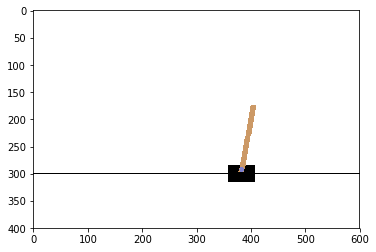

In [10]:
scores = []
choices = []
for each_game in range(50):
    score = 0
    prev_obs = []
    for step_index in range(goal_steps):
        plt.imshow(env.render(mode='rgb_array'))
        display.display(plt.gcf)
        #time.sleep(0.5)
        if len(prev_obs)==0:
            action = random.randrange(0,2)
        else:
            action = np.argmax(trained_model.predict(prev_obs.reshape(-1, len(prev_obs)))[0])
        
        choices.append(action)
        new_observation, reward, done, info = env.step(action)
        prev_obs = new_observation
        score+=reward
        if done:
            break

    env.reset()
    scores.append(score)

print(scores)
print('Average Score:',sum(scores)/len(scores))
print('choice 1:{}  choice 0:{}'.format(choices.count(1)/len(choices),choices.count(0)/len(choices)))